In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_colwidth', None)
plt.style.use('tableau-colorblind10')


In [2]:
df = pd.read_csv('train.csv')
df.head(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by Samsill,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [3]:
coba = df.copy()
coba['Order Date'] = pd.to_datetime(coba['Order Date'])
coba['Ship Date'] = pd.to_datetime(coba['Ship Date'])
coba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [4]:
coba.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
def new_df(data):
    data = data[['Order Date', 'Region', 'State', 'Sub-Category']]
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data = data.set_index('Order Date')
    data = data.sort_index()
    data['State'] = data['State'].replace({'Oklahoma': 'California', 'Missouri': 'New York', 'Alabama': 'Texas',
                                       'Arkansas': 'Pennsylvania', 'Rhode Island': 'Washington',
                                       'Mississippi': 'Illinois', 'Utah': 'Ohio', 'South Carolina': 'Florida',
                                       'Louisiana' : 'Michigan', 'Nevada' : 'North Carolina', 'Nebraska': 'Virginia',
                                       'New Mexico': 'Arizona', 'New Hampshire': 'Tennessee', 'Iowa': 'Colorado',
                                       'Kansas': 'Georgia', 'Idaho': 'Kentucky', 'Montana': 'Massachusetts', 
                                       'South Dakota': 'Indiana', 'Vermont': 'Oregon', 'District of Columbia' : 'New Jersey',
                                       'Maine': 'Wisconsin', 'North Dakota': 'Maryland', 'West Virginia': 'Delaware', 
                                       'Wyoming': 'California'})
    data['Sub-Category'] = data['Sub-Category'].replace({'Binders': 'Front Bumper', 'Paper': 'Headlight', 
                                                     'Furnishings': 'Grille', 'Phones': 'Fender', 
                                                     'Storage' : 'Indicator Lamp', 'Art' : 'Side Mirror',
                                                     'Accessories' : 'Fog Lamp', 'Chairs' : 'Tail Lamp',
                                                     'Appliances' : 'Filter', 'Labels' : 'Rear Bumper',
                                                     'Tables' : 'Front Bumper', 'Envelopes' : 'Headlight',
                                                     'Bookcases' : 'Grille', 'Fasteners' : 'Fender', 
                                                     'Supplies' : 'Indicator Lamp', 'Machines' : 'Side Mirror',
                                                     'Copiers' : 'Fog Lamp'})
    data['Region'] = data['Region'].replace({'West' : 'A', 'East': 'B', 'Central': 'C', 'South' : 'D'})
    data = data.rename(columns={'Sub-Category' : 'Product Name', 'Region': 'Dealer'})
    
    return data

In [6]:
new_data = new_df(df)
new_data.head()

,Dealer,State,Product Name
Order Date,,,
2015-01-02,C,Wisconsin,Fog Lamp
2015-01-03,B,New York,Fender
2015-01-03,A,Washington,Tail Lamp
2015-01-03,C,Illinois,Headlight
2015-01-03,C,Texas,Grille


In [7]:
new_data = new_data.groupby(['Order Date', 'State', 
                         'Dealer', 'Product Name'])[['Product Name']].count().rename(columns={
    'Product Name' : 'Quantity'}).reset_index()
new_data.sort_values(by='Quantity', ascending= False)
new_data = new_data.set_index('Order Date')

In [8]:
new_data['SKU'] = new_data['Product Name']
new_data['SKU'] = new_data['SKU'].where(new_data['Product Name'] != 'Front Bumper', 'WB-21850')
new_data['SKU'] = new_data['SKU'].where(new_data['Product Name'] != 'Headlight', 'MA-17560')
new_data['SKU'] = new_data['SKU'].where(new_data['Product Name'] != 'Grille', 'PP-18955')
new_data['SKU'] = new_data['SKU'].where(new_data['Product Name'] != 'Fender', 'JL-15835')
new_data['SKU'] = new_data['SKU'].where(new_data['Product Name'] != 'Indicator Lamp', 'JD-15895')
new_data['SKU'] = new_data['SKU'].where(new_data['Product Name'] != 'Side Mirror', 'CK-12205')
new_data['SKU'] = new_data['SKU'].where(new_data['Product Name'] != 'Fog Lamp', 'SV-20365')
new_data['SKU'] = new_data['SKU'].where(new_data['Product Name'] != 'Tail Lamp', 'EP-13915')
new_data['SKU'] = new_data['SKU'].where(new_data['Product Name'] != 'Filter', 'AP-10915')
new_data['SKU'] = new_data['SKU'].where(new_data['Product Name'] != 'Rear Bumper', 'ZC-21910')

In [9]:
new_data

,State,Dealer,Product Name,Quantity,SKU
Order Date,,,,,
2015-01-02,Wisconsin,C,Fog Lamp,1,SV-20365
2015-01-03,Illinois,C,Headlight,1,MA-17560
2015-01-03,Illinois,C,Tail Lamp,1,EP-13915
2015-01-03,New York,B,Fender,1,JL-15835
2015-01-03,Texas,C,Fender,1,JL-15835
...,...,...,...,...,...
2018-12-30,Colorado,A,Fender,1,JL-15835
2018-12-30,Indiana,C,Filter,1,AP-10915
2018-12-30,New York,B,Fender,1,JL-15835


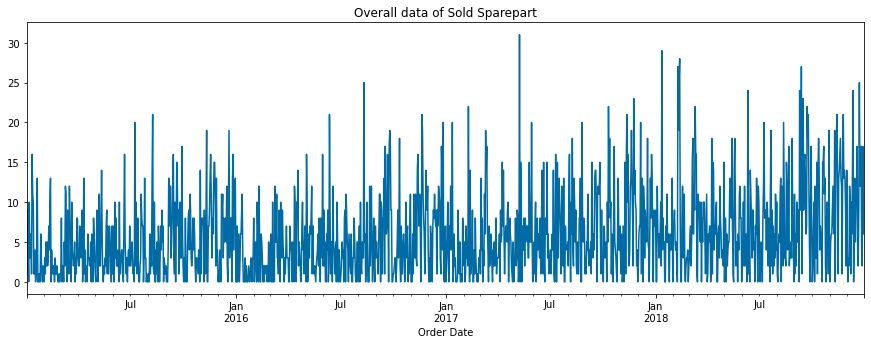

In [10]:
new_data.resample('D').count()['Product Name'].plot(figsize=(15, 5), title= 'Overall data of Sold Sparepart')
# plt.
plt.show()

In [11]:
new_data.to_csv('Automotive_Inventory_v2.csv')

----------------------

In [12]:
coba['Day'] = pd.to_datetime(coba['Order Date']).dt.day
coba['Month'] = pd.to_datetime(coba['Order Date']).dt.month
coba['Year'] = pd.to_datetime(coba['Order Date']).dt.year
coba.loc[coba['Order Date'].dt.year == 2015, 'Year'] = 2017
coba.loc[coba['Order Date'].dt.year == 2016, 'Year'] = 2018
coba['Order Date'] = pd.to_datetime(coba[['Year', 'Month', 'Day']])
coba = coba.drop(columns=['Day', 'Month', 'Year']).reset_index()
coba.head()

,index,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400
2,2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200
3,3,4,US-2016-108966,2018-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,4,5,US-2016-108966,2018-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Feature Selection

In [13]:
coba = coba[['Order Date', 'Region', 'State', 'Product ID', 'Sub-Category']]
coba

,Order Date,Region,State,Product ID,Sub-Category
0,2017-08-11,South,Kentucky,FUR-BO-10001798,Bookcases
1,2017-08-11,South,Kentucky,FUR-CH-10000454,Chairs
2,2017-12-06,West,California,OFF-LA-10000240,Labels
3,2018-11-10,South,Florida,FUR-TA-10000577,Tables
4,2018-11-10,South,Florida,OFF-ST-10000760,Storage
...,...,...,...,...,...
9795,2017-05-21,Central,Illinois,OFF-BI-10003429,Binders
9796,2018-12-01,East,Ohio,OFF-AR-10001374,Art
9797,2018-12-01,East,Ohio,TEC-PH-10004977,Phones
9798,2018-12-01,East,Ohio,TEC-PH-10000912,Phones


In [14]:
coba.groupby(['Order Date', 'Region'])[['Product ID']].count().reset_index()
coba = coba.set_index('Order Date')
coba.head()

,Region,State,Product ID,Sub-Category
Order Date,,,,
2017-08-11,South,Kentucky,FUR-BO-10001798,Bookcases
2017-08-11,South,Kentucky,FUR-CH-10000454,Chairs
2017-12-06,West,California,OFF-LA-10000240,Labels
2018-11-10,South,Florida,FUR-TA-10000577,Tables
2018-11-10,South,Florida,OFF-ST-10000760,Storage


In [15]:
coba.reset_index()

,Order Date,Region,State,Product ID,Sub-Category
0,2017-08-11,South,Kentucky,FUR-BO-10001798,Bookcases
1,2017-08-11,South,Kentucky,FUR-CH-10000454,Chairs
2,2017-12-06,West,California,OFF-LA-10000240,Labels
3,2018-11-10,South,Florida,FUR-TA-10000577,Tables
4,2018-11-10,South,Florida,OFF-ST-10000760,Storage
...,...,...,...,...,...
9795,2017-05-21,Central,Illinois,OFF-BI-10003429,Binders
9796,2018-12-01,East,Ohio,OFF-AR-10001374,Art
9797,2018-12-01,East,Ohio,TEC-PH-10004977,Phones
9798,2018-12-01,East,Ohio,TEC-PH-10000912,Phones


In [16]:
coba_2 = coba.reset_index()
coba_2 = coba_2.groupby(['Order Date', 'State', 
                         'Region', 'Sub-Category'])[['Sub-Category']].count().rename(columns={'Sub-Category' : 'Quantity'}).reset_index()
coba_2 = coba_2.rename(columns={'Sub-Category' : 'Product Name', 'Region': 'Dealer'})
coba_2

,Order Date,State,Dealer,Product Name,Quantity
0,2017-01-02,California,West,Paper,1
1,2017-01-02,Virginia,South,Storage,1
2,2017-01-02,Wisconsin,Central,Accessories,1
3,2017-01-03,Colorado,West,Phones,1
4,2017-01-03,Illinois,Central,Chairs,1
...,...,...,...,...,...
8521,2018-12-31,Texas,Central,Binders,1
8522,2018-12-31,Texas,Central,Fasteners,1
8523,2018-12-31,Texas,Central,Furnishings,1
8524,2018-12-31,Texas,Central,Storage,1


In [17]:
coba_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8526 entries, 0 to 8525
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    8526 non-null   datetime64[ns]
 1   State         8526 non-null   object        
 2   Dealer        8526 non-null   object        
 3   Product Name  8526 non-null   object        
 4   Quantity      8526 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 333.2+ KB


In [18]:
final_df = coba_2.copy()

In [19]:
final_df

,Order Date,State,Dealer,Product Name,Quantity
0,2017-01-02,California,West,Paper,1
1,2017-01-02,Virginia,South,Storage,1
2,2017-01-02,Wisconsin,Central,Accessories,1
3,2017-01-03,Colorado,West,Phones,1
4,2017-01-03,Illinois,Central,Chairs,1
...,...,...,...,...,...
8521,2018-12-31,Texas,Central,Binders,1
8522,2018-12-31,Texas,Central,Fasteners,1
8523,2018-12-31,Texas,Central,Furnishings,1
8524,2018-12-31,Texas,Central,Storage,1


## Time Features

In [20]:
def time_features(data):
    data['Weeknr'] = 0
    data['Year'] = data.index.year
    data['Month'] = data.index.month
    data['Week'] = data.index.week
    data['Weeknr'] = np.arange(data.shape[0])+ 1
    return data

## Visualization 

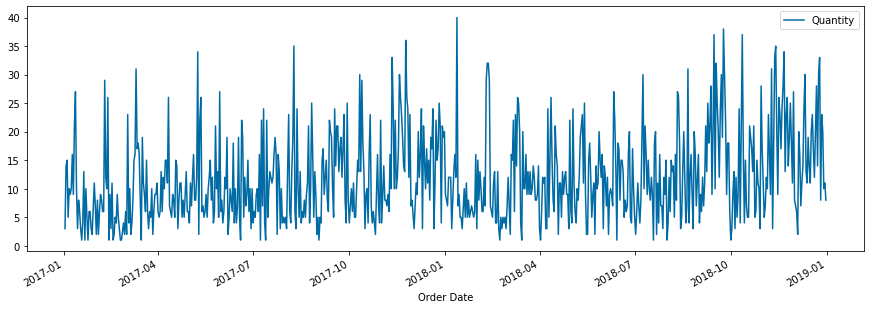

In [21]:
test = coba_2.groupby(['Order Date'])[['Quantity']].count()
test.plot(figsize=(15,5))
plt.show()

In [ ]:
test

In [22]:
test = time_features(test)
test

,Quantity,Weeknr,Year,Month,Week
Order Date,,,,,
2017-01-02,3,1,2017,1,1
2017-01-03,14,2,2017,1,1
2017-01-04,15,3,2017,1,1
2017-01-05,5,4,2017,1,1
2017-01-06,10,5,2017,1,1
...,...,...,...,...,...
2018-12-27,23,713,2018,12,52
2018-12-28,20,714,2018,12,52
2018-12-29,10,715,2018,12,52


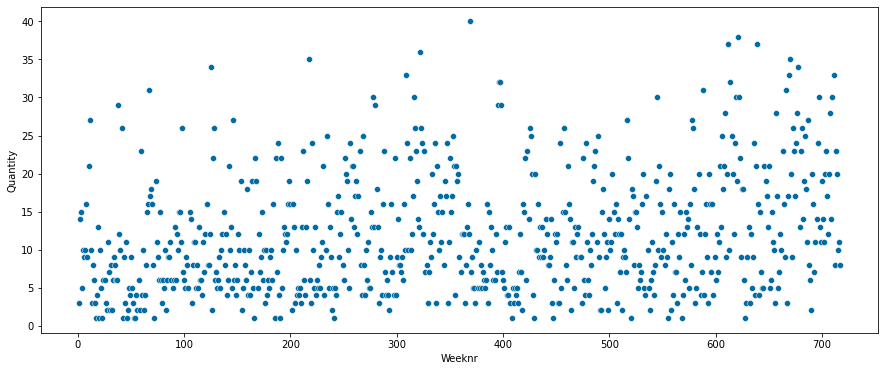

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data = test, x='Weeknr', y='Quantity')
plt.show()

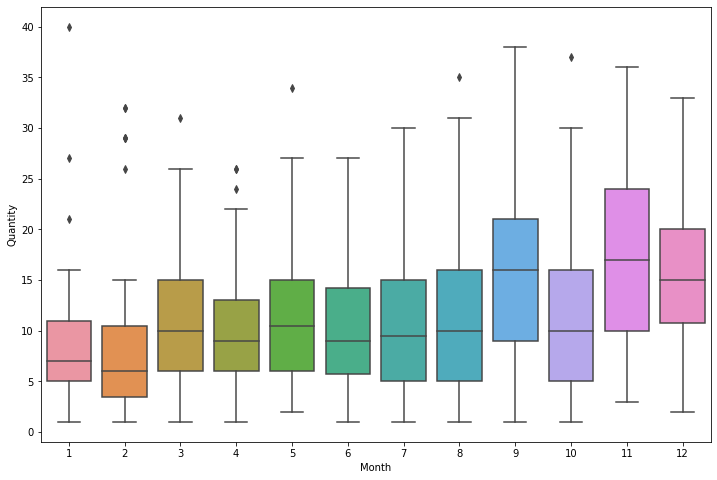

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data = test, x='Month', y='Quantity')
plt.show()

# Save to CSV

In [25]:
final_df.to_csv('Automotive_Inventory.csv', index=False)